# 딥러닝 모델링 

In [ ]:
# 패키지 설치
# !pip install tensorflow
# !pip install keras


In [ ]:
# 라이브러리 불러오기 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# 라이브러리 불러오기 2

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

---

**알고리즘 정리**

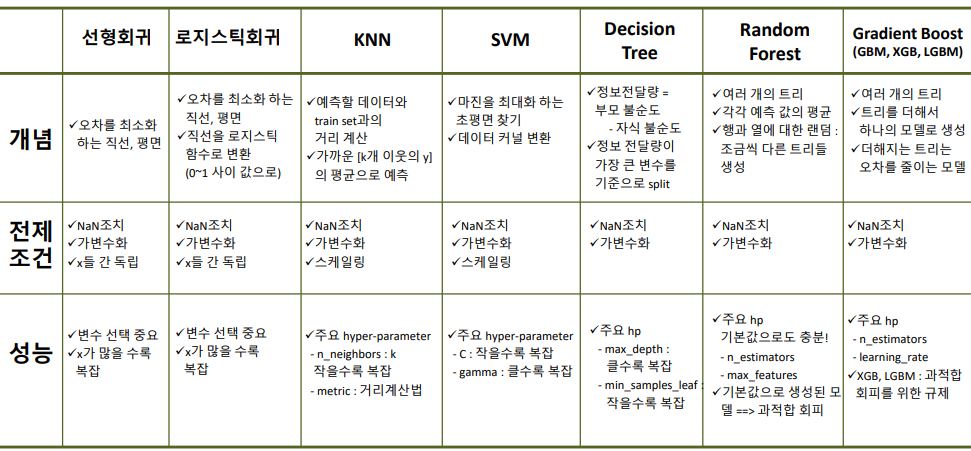

- 모델의 성능은 오차(error)를 통해 계산
    - 모델링: train error를 최소화 하는 모델을 생성하는 과정
    - 모델 튜닝: validation error를 최소화 하는 모델 선정

**평가 지표**
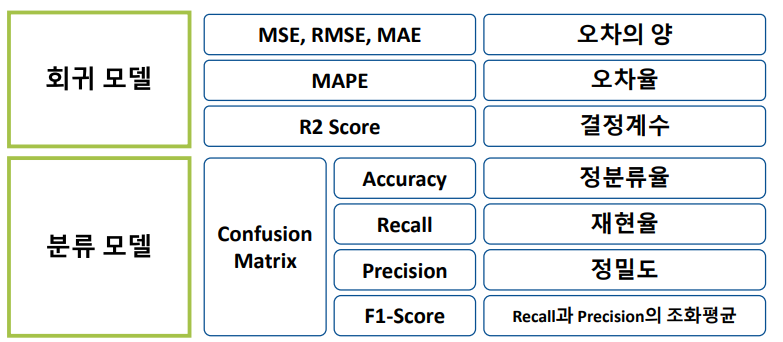

# 1. 기본 개념 - Regression

### 1. 전처리
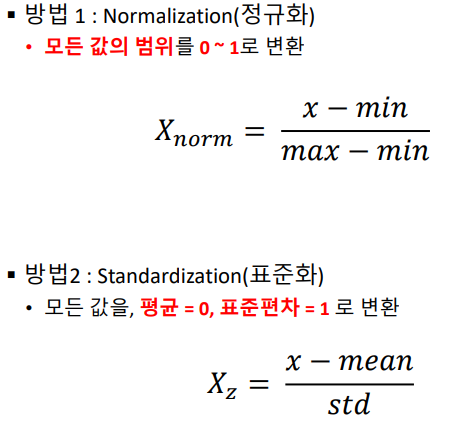

In [ ]:
# scaling

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

$ $

### 2. Dense

- `input_shape( , )`: 분석단위에 대한 shape
    - 1차원(features수, )
    - 2차원(rows, columns)
- `output`: 예측 결과가 1개 변수

In [ ]:
# Dense code

# 메모리 정리
clear_seesion()

# Seqeuntial타입
model = Sequential([Dense(1, input_shape=(nfeatures, ))])

# 모델요약
model.summary()

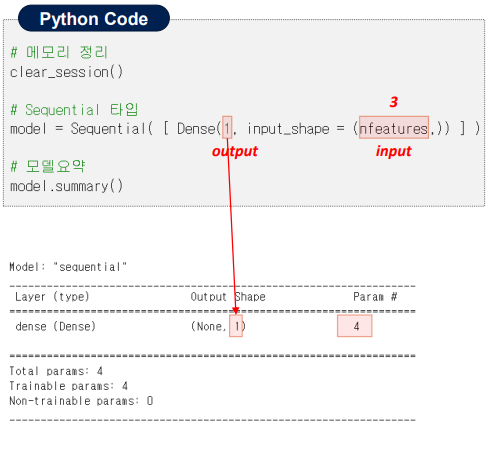

$ $

$ $

### 3. Compile
- 선언된 모델에 대해 몇 가지 설정을 한 후, 컴퓨터가 이해할 수 있는 형태로 변환하는 작업을 <span style="color:indianred">**컴파일**</span> 이라고 합니다.

- `loss function(오차함수)`: 오차 계산을 무엇으로 할지 결정
    - mse ...
- `optimizer`: 오차를 최소화 하도록 가중치를 조절하는 역할
    - optimizer = 'adam': learning_rate 기본값=0.001
    - optimizer = Adam(lr=0.1)옵션 값 조정 가능

In [ ]:
# Compile code

model.compile(optimizer='adam', loss='mse')

$ $

$ $

### 4. 학습, 학습곡선
- `epochs` 반복횟수
    - 가중치 조정 반복 횟수
    - **전체 데이터를 몇 번 학습**할 것인지 정해 줌
- `validation_split=0.2`
    - train데이터에서 20%를 검증셋으로 분리
- `.history`: 학습 수행과정을 전부 기록. -> 나중에 시각화를 위해 

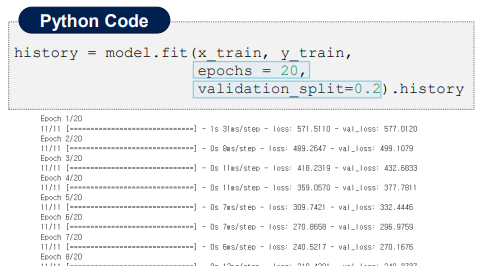
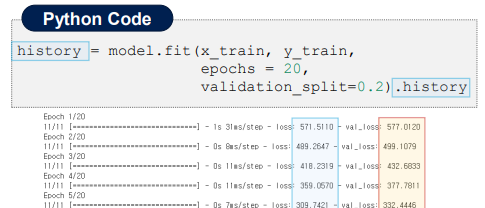

In [ ]:
# 학습 history code

history = model.fit(x_train, y_train,
                   epochs=20,                      # 20번 학습수행
                   validation_split=0.2).history   # validation data는 20퍼로 분리

**학습곡선**
- 바람직한 곡선의 모습
    - epoch가 증가하면서 loss가 큰 폭으로 축소
    - 점차 loss감소 폭이 줄어들면서 완만해짐
    
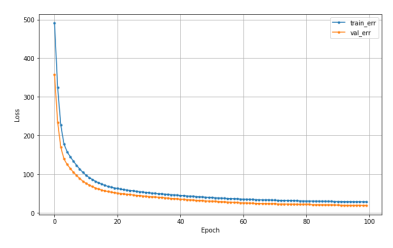    

- 잘못된 곡선의 모습
    1) loss줄어들지만 들쑥날쑥    
        -> Learning_rate를 줄이자.
    
    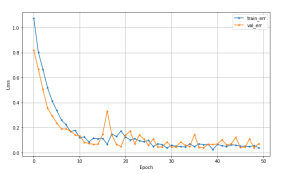
    
    2) val_loss가 줄어들다가 다시 상승(과적합)    
        -> epochs와 learning_rate를 조절.
    
    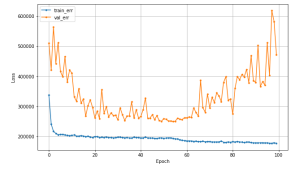

$ $

$ $

### 5) Hidden Layer

- layer 여러 개: <span style="color:indianred">**리스트[ ]**</span>로 입력
- hidden layer
    - input_shape는 첫번째 layer만 필요
    - activation
        - 히든 레이어는 활성함수를 필요로 한다.
        - 활성함수는 보통 'relu'사용(활성함수: 시그모이드, 쌍곡탄젠트, ReLU, 계단함수 등등)
- output layer
    - 예측 결과가 1개

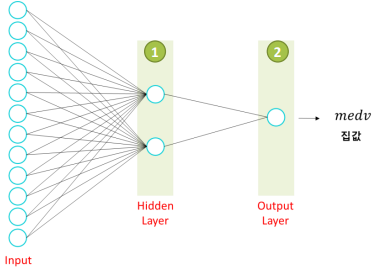

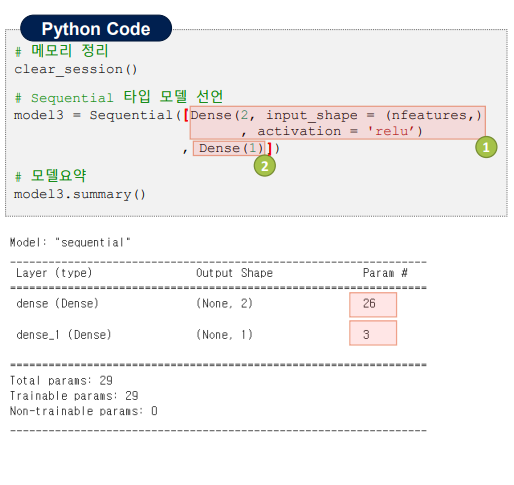

In [ ]:
# hidden layer code

# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(2, input_shape=(nfeatures,),    # 첫번째 은닉층, 최종 2개 정보만을 받을 거야.
                         activation='relu')               # 활성함수는 ReLU
                   , Dense(1)])                           # 최종아웃풋은 1개로 받을 거야.  

# 모델 요약
model.summary()


$ $

$ $

### 6) 활성화 함수 Activation Function

- Hidden Layer에서 선형함수를 비선형함수로 변환해 주는 역할
- Output Layer에서 결과 값을 다른 값으로 변환해 주는 역할
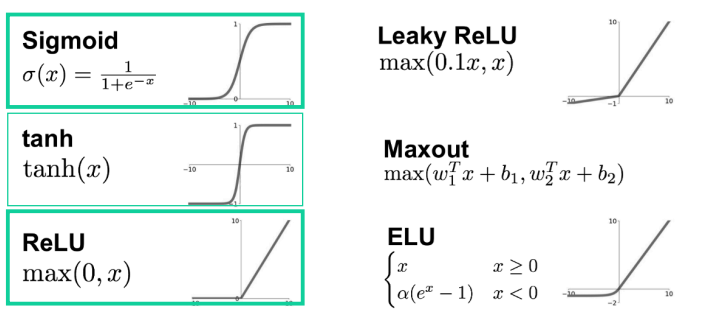

$ $

$ $

---

# 2. Regression: Carseat

In [19]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

### 1. 데이터 전처리
- 데이터 준비
- 가변수화
- 스케일링(필요시)
- 데이터 분할

**1) 데이터 준비**

In [2]:
# 데이터 준비

path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
carseat = pd.read_csv(path)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# target 설정

target = 'Sales'
x = carseat.drop(target, axis=1)
y = carseat.loc[:, target]

**2) 가변수화**

In [4]:
# 가변수화

cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

**3) 데이터 분할**

In [5]:
# 데이터분할 

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)

**4) scaling**

In [6]:
# 스케일링

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

$ $

### 2. 모델링
- 필요한 함수 불러오기
- 모델 선언
- 학습
- 예측
- 성능 검증

In [7]:
# 라이브러리 불러오기

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

**1) 모델 선언**

In [8]:
# 모델 선언
nfeatures = x_train.shape[1]   #num of columns

# 확인
nfeatures

18

In [9]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential(Dense(1, input_shape=(nfeatures,)))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 19        
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile 하기

model.compile(optimizer='adam', loss='mse')

**2) 학습**

In [11]:
model.fit(x_train, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 59.9400


**3) 예측**

In [12]:
pred = model.predict(x_val)

3/3 [==============================] - 0s 2ms/step


**4) 검증**
- 만든 모델이 얼마나 정확한지 검증해 봅시다.

In [14]:
print(f'RMSE  : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'r2    : {r2_score(y_val, pred)}')

RMSE  : 7.714901702946393
MAE   : 7.074812353283633
MAPE  : 38381435014349.72
r2    : -5.66614261146701


$ $

$ $

---

# 3. Regression: boston(시각화함수)

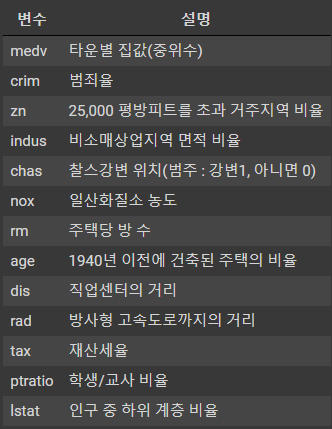

In [46]:
# 데이터 불러오기

path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**1) 데이터 준비**
- lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

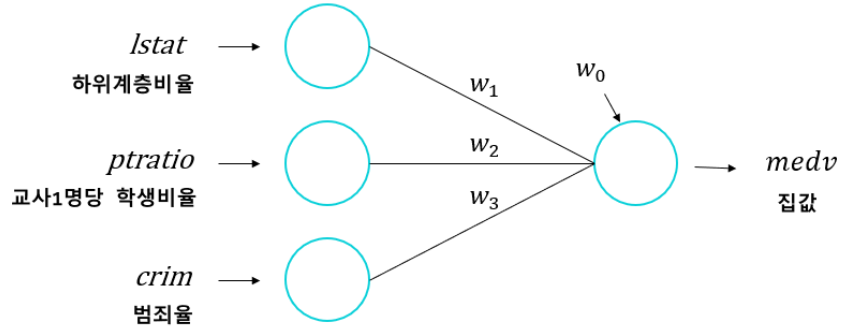

In [39]:
# 학습을 위한 데이터 분할
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)


# 스케일링 
scaler = MinMaxScaler()                      # 스케일러 선언
x_train = scaler.fit_transform(x_train)    # train 셋으로 fitting & 적용
x_val = scaler.transform(x_val)  # val셋은 적용만

**2) 모델 설계**

In [40]:
# 분석단위의 shape
nfeatures = x_train.shape[1]
nfeatures

3

In [41]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(Dense(1, input_shape=(nfeatures,)))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [42]:
# compile
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')  # lr=0.1, 손실함수는 'mse'

In [43]:
# 학습기록을 history에 저장

history = model.fit(x_train, y_train, 
                    epochs = 20, validation_split=0.2).history     
# epochs 횟수, validation_split 검증용데이터 나누기

Epoch 1/20
11/11 [==============================] - 0s 17ms/step - loss: 550.5235 - val_loss: 558.0148
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 470.3575 - val_loss: 481.5096
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 401.7465 - val_loss: 418.0541
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 345.1174 - val_loss: 365.3070
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 298.6965 - val_loss: 322.6824
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 261.3990 - val_loss: 289.2188
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 233.1549 - val_loss: 262.7201
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 210.8102 - val_loss: 242.6073
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 193.4458 - val_loss: 226.5547
Epoch 10/20
11/11 [==============================] - 0s 5ms/step - loss: 180.6038

**3) 학습결과 그래프**

In [21]:
# history 시각화 함수

def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

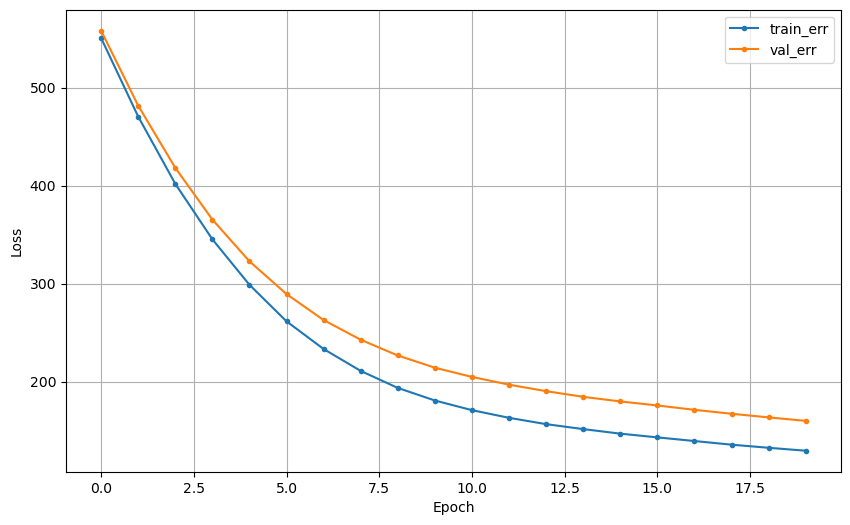

In [44]:
#  시각화

dl_history_plot(history)

**4) 예측 및 검증**

In [45]:
# 예측
pred = model.predict(x_val)

# 검증
print(f'RMSE  : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'r2    : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
RMSE  : 9.669337883273826
MAE   : 6.451241568023083
MAPE  : 0.3384883110067152
r2    : -0.4516801527059502


$ $

$ $

---

# 4. Hidden Layer 추가

### 1) 데이터 전처리

In [47]:
# 학습을 위한 데이터 분할
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)


# 스케일링 
scaler = MinMaxScaler()                      # 스케일러 선언
x_train = scaler.fit_transform(x_train)    # train 셋으로 fitting & 적용
x_val = scaler.transform(x_val) # val셋은 적용만

### 2) 모델링

In [48]:
# 분석단위의 shape
nfeatures = x_train.shape[1]
nfeatures

12

In [49]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트)
model2 = Sequential([Dense(4, input_shape=(nfeatures,), activation='relu'),
                     Dense(1)])

# 모델 요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 52        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [50]:
# compile

model2. compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [51]:
# 학습
history2 = model2.fit(x_train, y_train, epochs=50, validation_split=0.2). history

Epoch 1/50
11/11 [==============================] - 0s 15ms/step - loss: 386.7557 - val_loss: 221.0231
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 159.9996 - val_loss: 161.8470
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 118.6956 - val_loss: 113.2815
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 90.0123 - val_loss: 80.7600
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 70.6971 - val_loss: 61.8991
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 62.1741 - val_loss: 53.0624
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 57.7537 - val_loss: 48.8524
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 55.1376 - val_loss: 44.8317
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 52.8968 - val_loss: 42.4576
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 48.1274 - val_loss: 

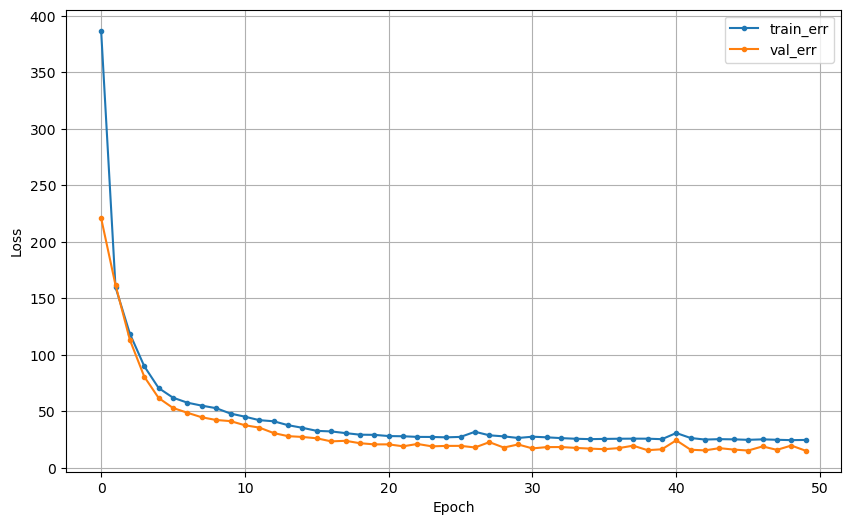

In [52]:
# 학습결과 그래프
dl_history_plot(history2)

###3) 예측 및 평가

In [54]:
# 예측
pred2 = model2.predict(x_val)

# 검증
print(f'RMSE  : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE   : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred2)}')
print(f'r2    : {r2_score(y_val, pred2)}')

4/4 [==============================] - 0s 2ms/step
RMSE  : 4.467952965954266
MAE   : 3.4390124694973814
MAPE  : 0.17528542564890143
r2    : 0.6900478510356385


$ $

**`성능을 높이기 위해 조절해야 할 것들`**
- 히든레이어 수
- 히든레이어 노드 수
- epochs 수
- learing_rate: 0.1 ~ 0.0001 사이에서 조정
    - Adam(learing_rate=0.01)